In [16]:

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import plotly.express as px
from auto_ts import auto_timeseries

In [17]:
df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv', index_col=0, parse_dates=True)

In [18]:
df

demand  precip   temp
timeStamp                                 
2012-01-01 00:00:00  4937.5  0.0000  46.13
2012-01-01 01:00:00  4752.1  0.0000  45.89
2012-01-01 02:00:00  4542.6  0.0000  45.04
2012-01-01 03:00:00  4357.7  0.0000  45.03
2012-01-01 04:00:00  4275.5  0.0000  42.61
...                     ...     ...    ...
2017-08-12 02:00:00     NaN  0.0000  70.84
2017-08-12 03:00:00     NaN  0.0000  70.57
2017-08-12 04:00:00     NaN  0.0000  69.89
2017-08-12 05:00:00     NaN  0.0000  68.59
2017-08-12 06:00:00     NaN  0.0031  67.33

[49205 rows x 3 columns]

In [19]:
df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [20]:

fig = px.line(df.reset_index(), x='timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

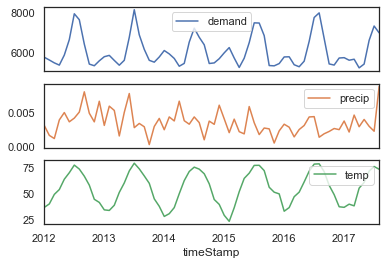

In [21]:

df.resample('M').mean().plot(subplots=True)

In [22]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  49205
Columns  :  3

Features : 
 ['demand', 'precip', 'temp']

Missing values :   demand    True
precip    True
temp      True
dtype: bool

Unique values :  
 demand    40972
precip     1004
temp       7580
dtype: int64


In [23]:
df.query('demand != demand')

demand  precip   temp
timeStamp                                 
2012-03-11 02:00:00     NaN  0.0000  37.78
2013-03-10 02:00:00     NaN  0.0000  38.18
2014-03-09 02:00:00     NaN  0.0000  40.86
2015-03-08 02:00:00     NaN  0.0000  36.96
2015-03-11 11:00:00     NaN  0.0000  49.95
...                     ...     ...    ...
2017-08-12 02:00:00     NaN  0.0000  70.84
2017-08-12 03:00:00     NaN  0.0000  70.57
2017-08-12 04:00:00     NaN  0.0000  69.89
2017-08-12 05:00:00     NaN  0.0000  68.59
2017-08-12 06:00:00     NaN  0.0031  67.33

[81 rows x 3 columns]

In [24]:
df['demand']=df['demand'].fillna(method='ffill')
df['temp']=df['temp'].fillna(method='ffill')

In [25]:

ny_df=df.resample('M').mean().reset_index()

In [26]:
ny_df

timeStamp       demand    precip       temp
0  2012-01-31  5757.495833  0.003116  37.174288
1  2012-02-29  5622.331609  0.001650  40.448046
2  2012-03-31  5479.919198  0.001179  49.607917
3  2012-04-30  5368.945833  0.003959  54.255903
4  2012-05-31  5867.896102  0.005064  64.188078
..        ...          ...       ...        ...
63 2017-04-30  5233.477382  0.002942  55.621764
64 2017-05-31  5421.773060  0.004031  61.115457
65 2017-06-30  6597.990346  0.003008  71.962625
66 2017-07-31  7306.861511  0.002272  76.380363
67 2017-08-31  6711.707542  0.008961  73.730258

[68 rows x 4 columns]

In [27]:

train=ny_df[(ny_df['timeStamp'] >= '2012-01-01') & (ny_df['timeStamp'] <= '2017-04-30')]
test=ny_df[(ny_df['timeStamp'] > '2017-04-30')]

In [31]:

model = auto_timeseries(score_type='rmse', time_interval='M', non_seasonal_pdq=(2,1,2), seasonality=True, model_type=['best'], verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Error: Stationary test failed. Data must be np.array. Check your input and try stationary test again
    Target variable given as = demand
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: timeStamp sep: , target: demand
    Loaded pandas dataframe...
    pandas Dataframe loaded successfully. Shape of data set = (64, 2)


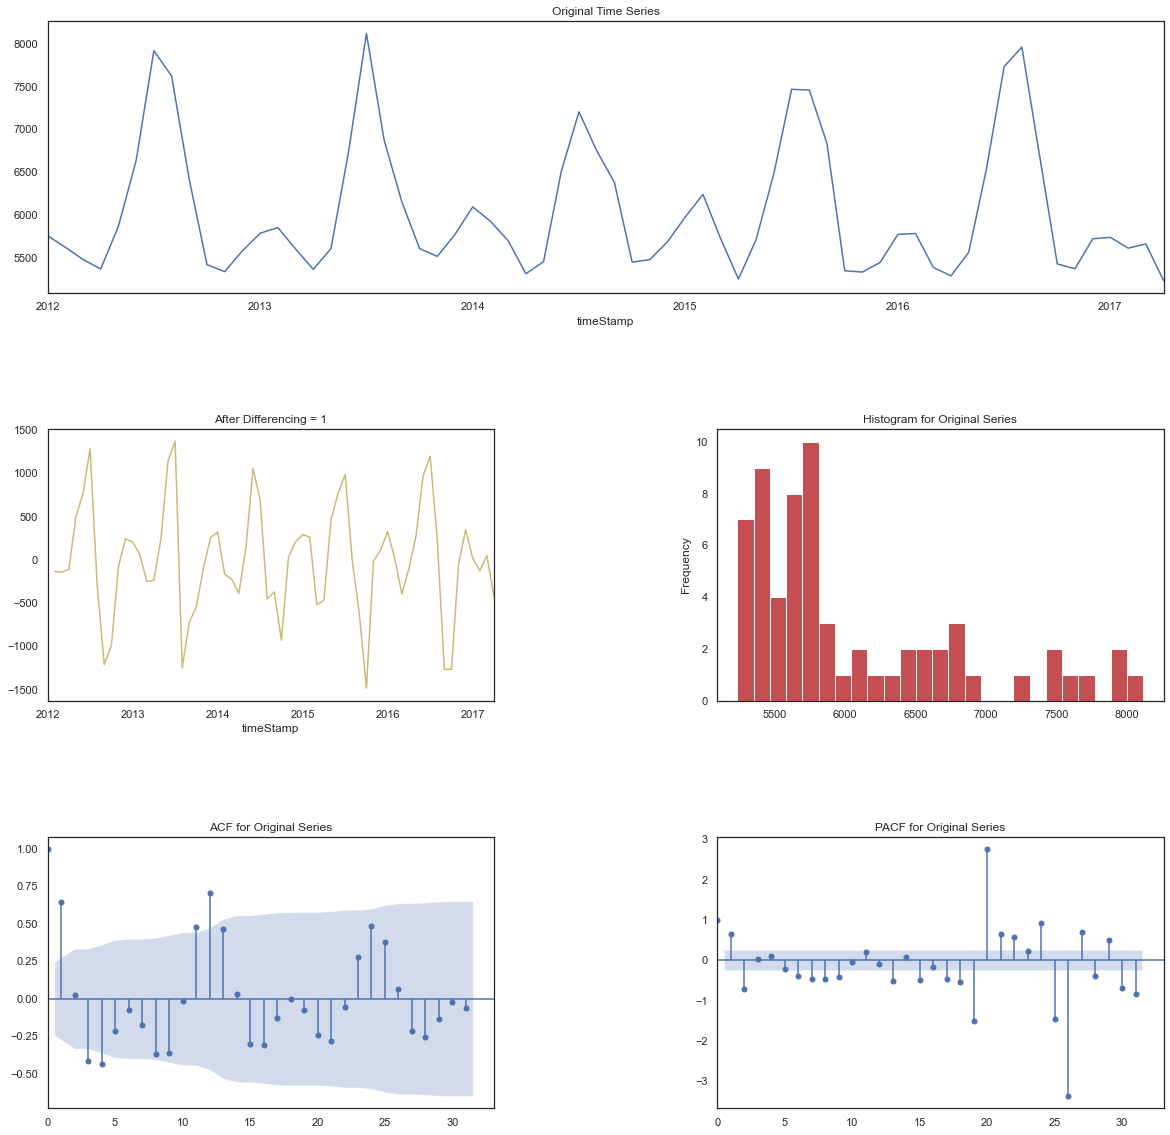

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(64, 3)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3

Fold Number: 1 --> Train Shape: 49 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 119.77
    Std Deviation of actuals = 444.88
    Normalized RMSE = 27%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 54 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 459.47
    Std Deviation of actuals = 1,096.97
    Normalized RMSE = 42%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 59 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 265.69
    Std Devi

 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=731.781, Time=0.51 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=733.733, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=732.587, Time=0.08 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=733.384, Time=0.38 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.89 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=735.360, Time=0.22 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=732.067, Time=0.44 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=733.755, Time=0.36 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,0,1)(0,1,1)[12]             : AIC=730.526, Time=0.24 sec
 ARIMA(0,0,1)(0,1,0)[12]             : AIC=730.586, Time=0.06 sec
 ARIMA(0,0,1)(1,1,1)[12]             : AIC=730.321, Time=0.45 sec
 ARIMA(0,0,1)(1,1,0)[12]      

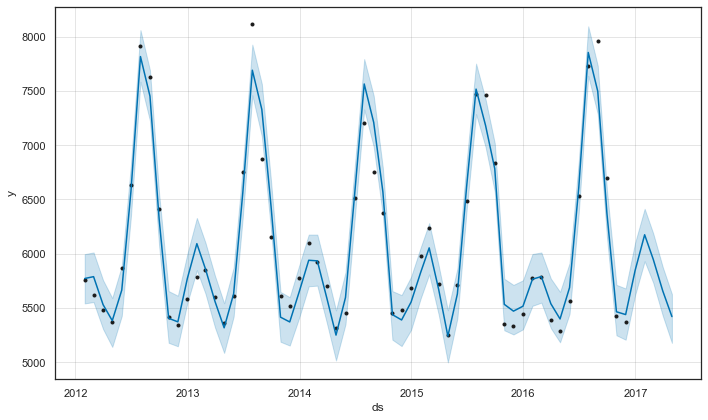

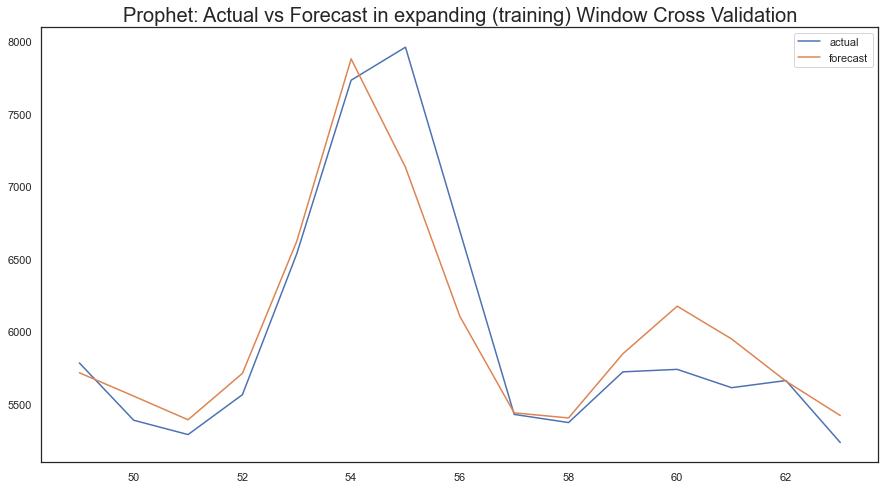

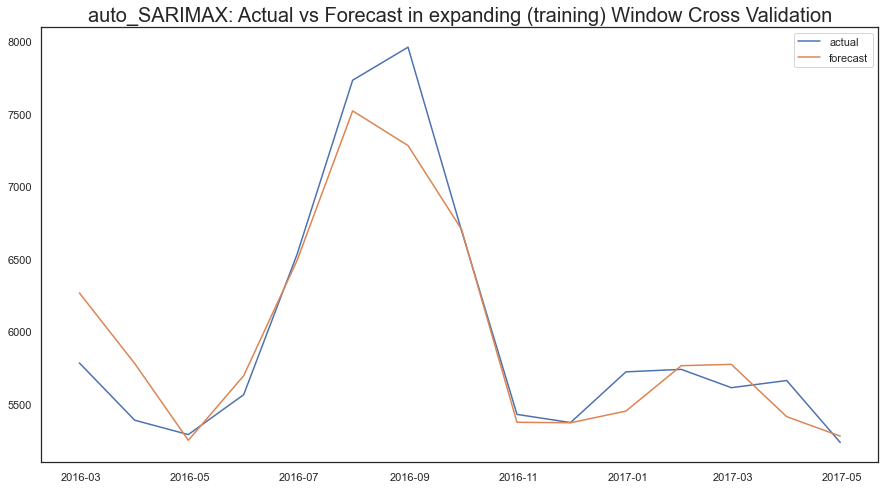

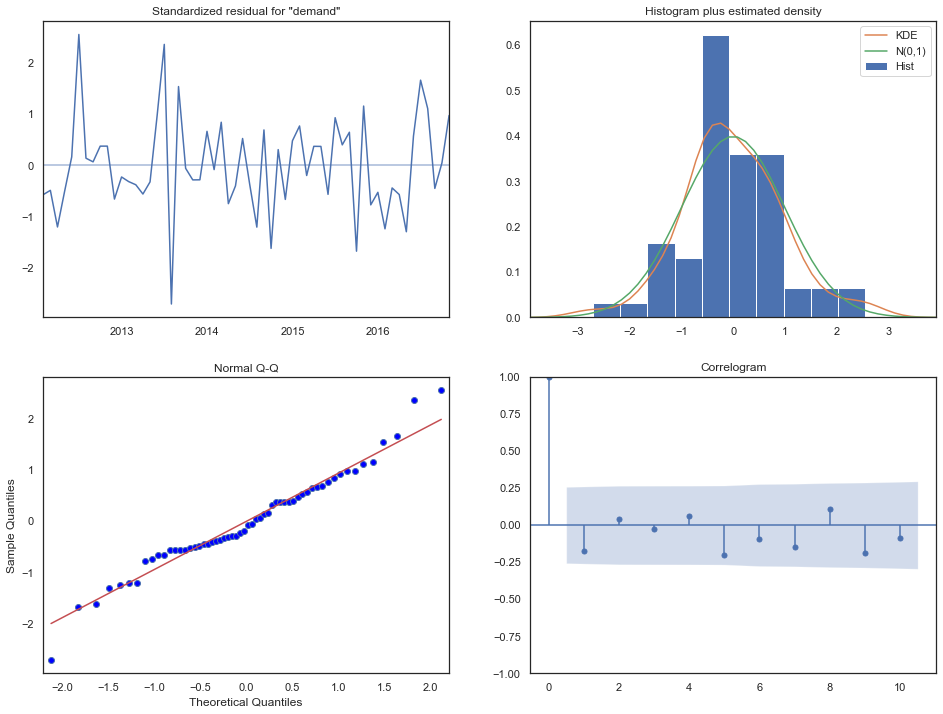

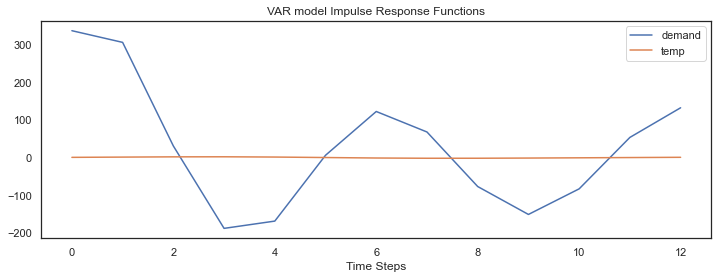

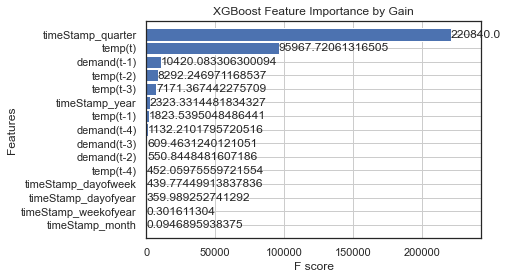

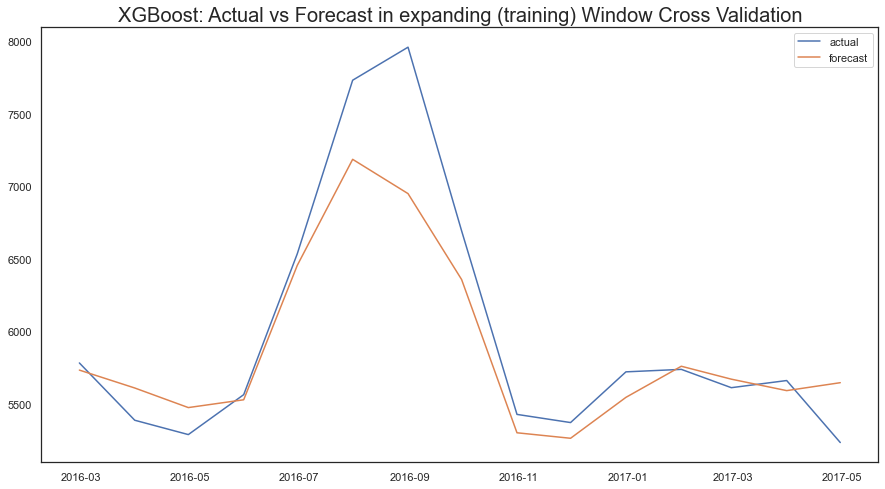

In [32]:

model.fit(traindata=train[['timeStamp','demand','temp']], ts_column='timeStamp', target='demand', cv=3)

In [33]:
model.get_leaderboard()

name        rmse
1  auto_SARIMAX  261.599356
0       Prophet  281.641704
3            ML  294.022616
2           VAR  485.371969

In [34]:
model.get_cv_scores()

Model   CV Scores
0        Prophet  119.767661
1        Prophet  459.465887
2        Prophet  265.691565
3   auto_SARIMAX  285.121703
4   auto_SARIMAX  318.701387
5   auto_SARIMAX  180.974978
6            VAR  598.538245
7            VAR  636.392658
8            VAR  221.185003
9             ML  137.255427
10            ML  539.908388
11            ML  204.904032

In [35]:
results_dict = model.get_ml_dict()

In [36]:
results_dict['VAR']['forecast']

[array([6201.12031546, 6236.0570918 , 5940.44780128, 5721.08191984,
        5867.9709859 ]),
 array([7110.78585582, 6862.24568284, 6168.37898802, 5681.85594989,
        5678.99828678]),
 array([5741.58492784, 5968.10512434, 5801.5170326 , 5536.30743748,
        5607.15859212])]

In [37]:
future_predictions = model.predict(testdata=test[['timeStamp','demand','temp']], model='ML')  
future_predictions

For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    ML predictions completed


yhat  mean_se  mean_ci_lower  mean_ci_upper
timeStamp                                                     
2017-05-31  5703.109863      NaN            NaN            NaN
2017-06-30  6578.153320      NaN            NaN            NaN
2017-07-31  7343.988281      NaN            NaN            NaN
2017-08-31  6820.104492      NaN            NaN            NaN

In [38]:
test

timeStamp       demand    precip       temp
64 2017-05-31  5421.773060  0.004031  61.115457
65 2017-06-30  6597.990346  0.003008  71.962625
66 2017-07-31  7306.861511  0.002272  76.380363
67 2017-08-31  6711.707542  0.008961  73.730258

In [39]:
future_predictions = model.predict(testdata=test[['timeStamp','demand','temp']], model='VAR')  
future_predictions

demand             yhat     mean_se  mean_ci_lower  mean_ci_upper
2017-05-31  5412.818213  337.605375    4751.123837    6074.512589
2017-06-30  6116.359103  486.845795    5162.158878    7070.559327
2017-07-31  6757.493415  523.517943    5731.417103    7783.569728
2017-08-31  6875.345067  556.480092    5784.664127    7966.026006

In [40]:
future_predictions = model.predict(testdata=test[['timeStamp','demand','temp']], model='Prophet')  
future_predictions

Building Forecast dataframe. Forecast Period = 4


ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2017-05-31  5994.634286  5402.189839  5869.624308  5994.616635  5994.647198   
1 2017-06-30  5995.018434  6322.818419  6817.613409  5994.927960  5995.101319   
2 2017-07-31  5995.415387  7440.902382  7939.220933  5995.222459  5995.579768   
3 2017-08-31  5995.812340  7101.592163  7595.504470  5995.491459  5996.088061   

   additive_terms  additive_terms_lower  additive_terms_upper       yearly  \
0     -353.356500           -353.356500           -353.356500  -353.356500   
1      583.978907            583.978907            583.978907   583.978907   
2     1713.104664           1713.104664           1713.104664  1713.104664   
3     1355.175826           1355.175826           1355.175826  1355.175826   

   yearly_lower  yearly_upper  multiplicative_terms  \
0   -353.356500   -353.356500                   0.0   
1    583.978907    583.978907                   0.0   
2   1713.104664   1713.104664                   0.0   
3   1355.175826   1355.175826                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                         0.0                         0.0  5641.277786  
1                         0.0                         0.0  6578.997341  
2                         0.0                         0.0  7708.520051  
3                         0.0                         0.0  7350.988165